In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split #importer le packer qui permit de separer le data en deux paries
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier #pour cree le modele tree
from sklearn.metrics import f1_score, recall_score, confusion_matrix,classification_report #pour voir les details sur les faux positif et negatif avecle f_score est un raport entre la pecision et le recoll
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import learning_curve #pour comprendre si notre model est en overfitige ou en uverfiting
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix


In [2]:
data=pd.read_csv("Shill Bidding Dataset.csv",sep=',')
data1=data.copy()
Y=data1['Class']#la variable targete c'est les resultat
X=data1.drop(columns=['Auction_ID','Record_ID','Bidder_ID','Class'],axis=1)#la  variable qui jour le rele de X


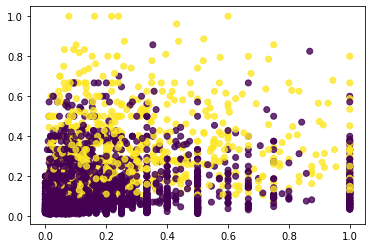

In [3]:
plt.scatter(X[:, 0],X[:, 1], c=Y,alpha=0.8 )

In [ ]:
plt.scatter(X[, 0],X[:, 1], c=Y,alpha=0.8 )

# separer le dataset en train test set

In [38]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
print(f' data_xtain{ x_train.shape } data_test { x_test.shape}')
print (f' data_ytrain {y_train.shape}  , data_ytest {y_test.shape}')

 data_xtain(5056, 9) data_test (1265, 9)
 data_ytrain (5056,)  , data_ytest (1265,)


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

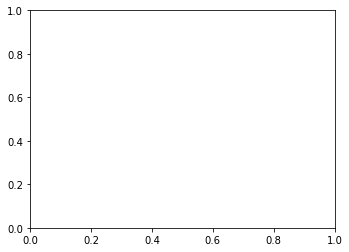

In [5]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(x_train.iloc[:, 0],x_train.iloc[:, 1], c=y_train,alpha=0.8 )
plt.title('train set')
plt.subplot(122)
plt.scatter(x_test.iloc[:, 0],x_test.iloc[:, 1], c=y_test,alpha=0.8 )
plt.title('test set')

In [19]:
#model=make_pipeline(SelectKBest(f_classif,k='all'),DecisionTreeClassifier(random_state=0, max_depth=5))
preprocessor = make_pipeline(PolynomialFeatures(20), SelectKBest(f_classif, k= 10))

In [516]:
randomForest=make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
decisionTree=make_pipeline(preprocessor,DecisionTreeClassifier(random_state=0, max_ ))
adaBoost=make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVM=make_pipeline(preprocessor,SVC(random_state=0))
KNN= make_pipeline(preprocessor,KNeighborsClassifier())

In [517]:
dict_of_models={'randomForest':randomForest,
                'decisionTree': decisionTree,
                'adaBoost': adaBoost,
                'SVM': SVM,
                'KNN': KNN}

randomForest
[[1125    7]
 [   4  129]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1132
           1       0.95      0.97      0.96       133

    accuracy                           0.99      1265
   macro avg       0.97      0.98      0.98      1265
weighted avg       0.99      0.99      0.99      1265

decisionTree
[[1132    0]
 [   8  125]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1132
           1       1.00      0.94      0.97       133

    accuracy                           0.99      1265
   macro avg       1.00      0.97      0.98      1265
weighted avg       0.99      0.99      0.99      1265

adaBoost
[[1123    9]
 [   5  128]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1132
           1       0.93      0.96      0.95       133

    accuracy                           0.99      1265
   macro avg

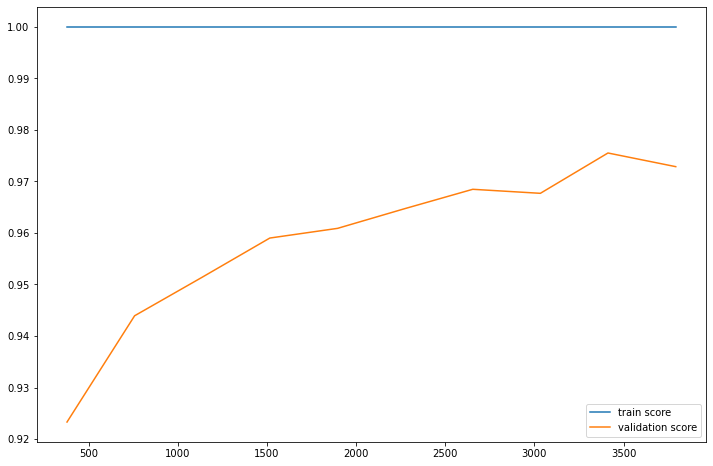

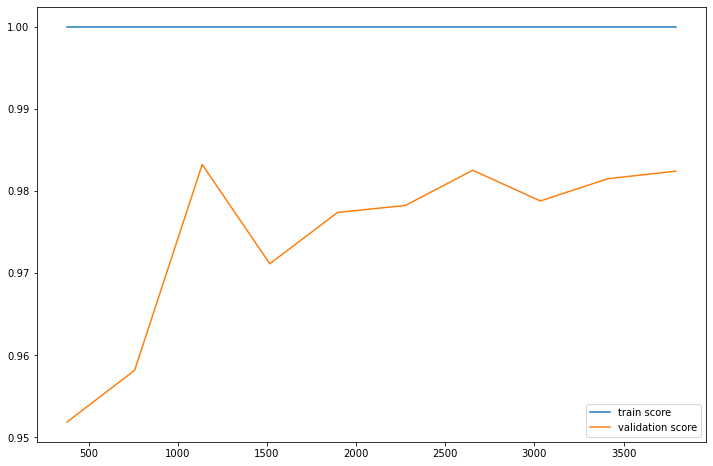

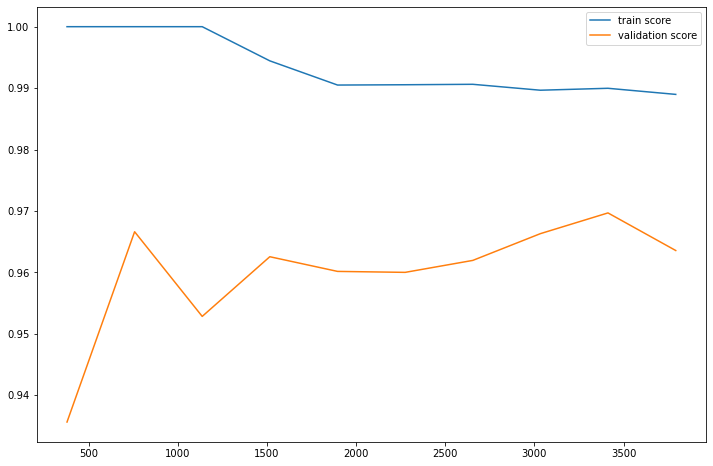

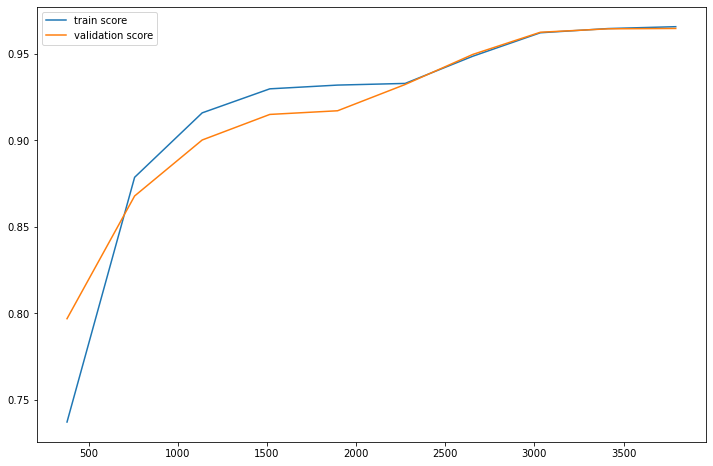

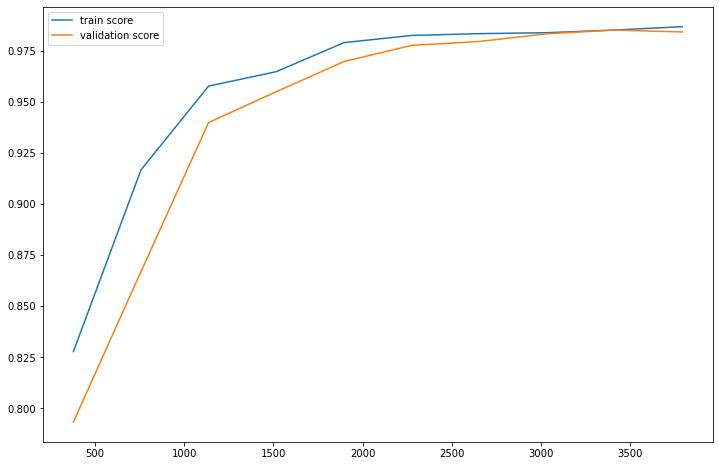

In [518]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [519]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('selectkbest', SelectKBest(k='all'))])),
                ('svc', SVC(random_state=0))])

In [520]:
hyper_params={'svc__gamma':[1e-3,1e-4] ,
              'svc__C':[1,10,100,1000]}

In [521]:
grid=GridSearchCV(SVM,hyper_params,scoring='recall',cv=4)

grid.fit(x_train,y_tain)

print(grid.best_params_ )

y_pred = grid.predict(x_test)

print(classification_report(y_test,y_pred))

{'svc__C': 1, 'svc__gamma': 0.001}
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1132
           1       0.00      0.00      0.00       133

    accuracy                           0.89      1265
   macro avg       0.45      0.50      0.47      1265
weighted avg       0.80      0.89      0.85      1265



/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[1132    0]
 [ 133    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1132
           1       0.00      0.00      0.00       133

    accuracy                           0.89      1265
   macro avg       0.45      0.50      0.47      1265
weighted avg       0.80      0.89      0.85      1265



/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


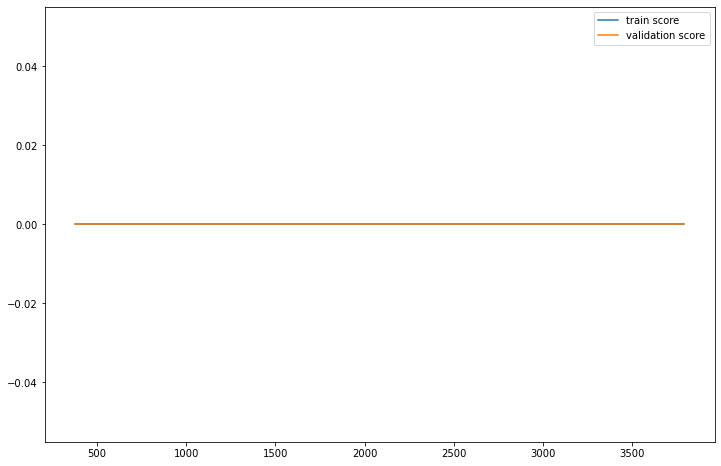

In [522]:
evaluation(grid.best_estimator_)

In [39]:
model= DecisionTreeClassifier(random_state=0, max_depth=5)
#model=RandomForestClassifier(random_state=0)
#model=make_pipeline(SelectKBest(f_classif,k='all'),RandomForestClassifier(random_state=0))

# procedure d'ivaluation pour les evaluation recoll  et precission pour les deux types d'erreur faux positif et faux nigatif.


In [40]:
def evaluation(model):#la nous allons entrainer notre model
    model.fit(x_train, y_train)#entainer le model avec data train
    ypred= model.predict(x_test)#prediction de model sur le data test
    #y_pred_prob = model.predict_proba(x_test)

    print(confusion_matrix(y_test,ypred))#affichage de matrice de cofusion entre le vrai y_test et  le y_test predie
    print(classification_report(y_test,ypred))
    

In [41]:
evaluation(model)


[[1125    0]
 [   6  134]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1125
           1       1.00      0.96      0.98       140

    accuracy                           1.00      1265
   macro avg       1.00      0.98      0.99      1265
weighted avg       1.00      1.00      1.00      1265



# learning_curve pour la validation croiser pour evaluer notre model sur plusieurs splite de dataset



In [84]:
def evaluation(model):#la nous allons entrainer notre model
    model.fit(x_train, y_train)#entainer le model avec data train
    ypred= model.predict(x_test)#prediction de model sur le data test
    cmatrix=confusion_matrix(y_test,ypred)
    print(cmatrix)#affichage de matrice de cofusion entre le vrai y_test et  le y_test predie
    print(classification_report(y_test,ypred))
    N,train_score,val_score= learning_curve(model,x_train,y_train,cv=4,scoring ='f1',
                                            train_sizes=np.linspace(0.1, 1, 10))#cv est la cruve validation pour la validation croisis pour voir si le model a besoin de plus de donnée pour s'amelliorer
    plt.figure(figsize=(12,8))#creation d'une figure
    plt.plot(N,train_score.mean(axis=1),label='train score')#affichage de l'evolution de train_score par rapport a N (nombre de d"echantillon qui on servie a entrainer le model )
    plt.plot(N,val_score.mean(axis=1),label='validation score')
    plt.legend()#pour ajouter une legende au graphe
    return cmatrix

# drow the Tree

In [61]:
d=pd.DataFrame(model.feature_importances_, index=x_train.columns)


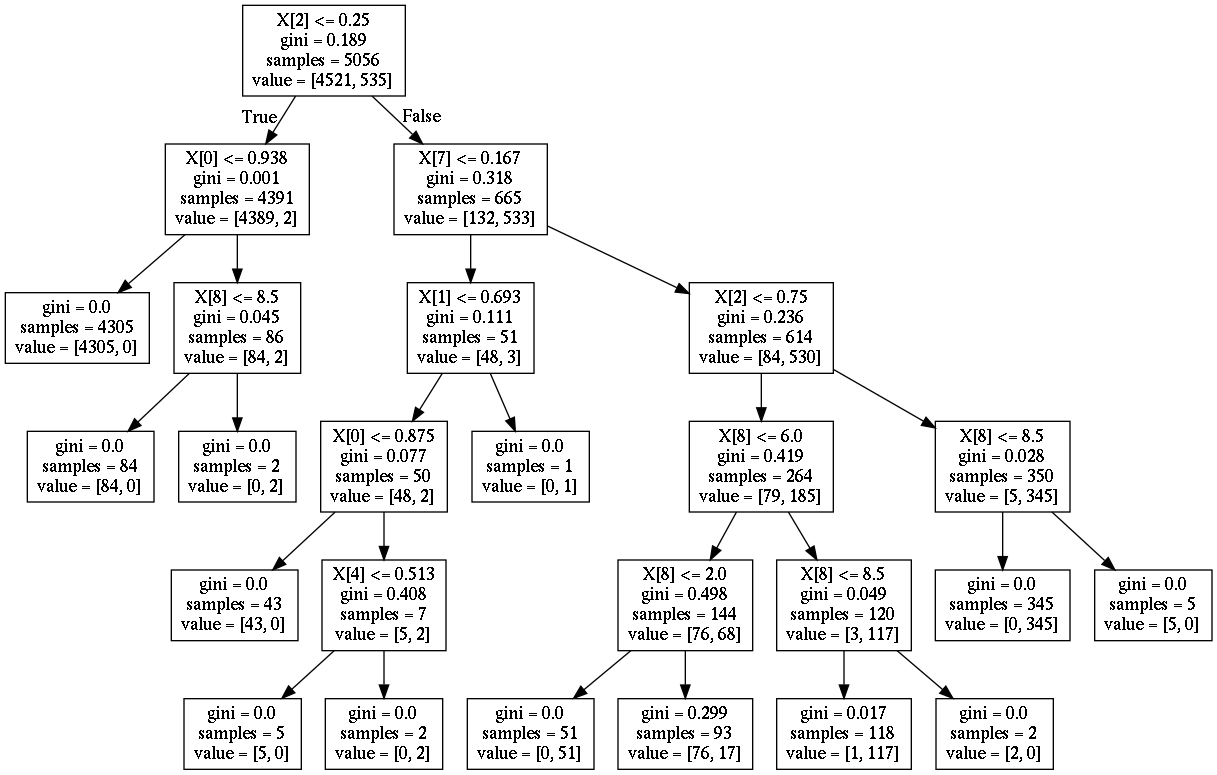

In [73]:
from sklearn.tree import export_graphviz #la librire pour dessiner le tree
import pydotplus 
from IPython.display import Image

#create dot data 
 
dot_data = tree.export_graphviz(model, out_file=None)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

[[1125    0]
 [   6  134]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1125
           1       1.00      0.96      0.98       140

    accuracy                           1.00      1265
   macro avg       1.00      0.98      0.99      1265
weighted avg       1.00      1.00      1.00      1265



array([[1125,    0],
       [   6,  134]])

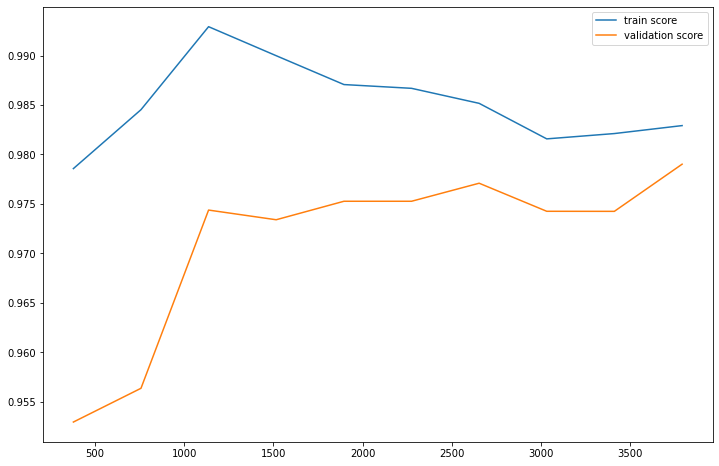

In [85]:
cmatrix=evaluation(model)
cmatrix

In [88]:
cmatrix

array([[1125,    0],
       [   6,  134]])

In [94]:
plot_confusion_matrix(cmatrix, x_train.values, y_train) 

ValueError: plot_confusion_matrix only supports classifiers

In [89]:
plot_confusion_matrix(cmatrix,['gggggggg','ttttttttt'],['rrrrr'],
                     cmap=None,
                     normalize=False)

ValueError: plot_confusion_matrix only supports classifiers

In [90]:
model.feature_importances_

array([0.00115863, 0.00194934, 0.8259051 , 0.        , 0.00308211,
       0.        , 0.        , 0.06573137, 0.10217345])

In [35]:
np.DataFrame(model.feature_importances_, index=x_train.columns).plot.bar(figsize=(12,8))

AttributeError: module 'numpy' has no attribute 'DataFrame'

# precision recall curve

In [524]:
grid.best_estimator_.decision_function

<function sklearn.pipeline.Pipeline.decision_function(self, X)>

In [525]:
precision, recall, thereshold = precision_recall_curve(y_test,grid.best_estimator_.decision_function(x_test))

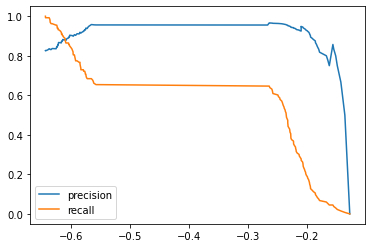

In [527]:
plt.plot(thereshold, precision[:-1], label="precision")
plt.plot(thereshold, recall[:-1], label="recall")
plt.legend()

In [528]:
def model_final(model,x,thereshold=0):
    return model.decision_function(x)> thereshold

In [543]:
y_pred = model_final(grid.best_estimator_,x_test,thereshold=-0.7)

In [544]:
f1_score(y_test,y_pred)

0.8692810457516339

In [545]:
recall_score(y_test,y_pred)

1.0